# Errors


## Motivation
So far in this course, when we ran into an errror our code just crashed. Like such:

In [1]:
print(a)

NameError: name 'a' is not defined

In [2]:
x = 5/0

ZeroDivisionError: division by zero

Here we have two different error NameError and ZeroDivisionError
But in a "real" Software we don't want our whole program to crash. A lot of errors can be anticipated and therefore "handled" by us. This is what we will have a look at first

In order for our code not to crash we need to tell Python that we want to "catch" errors. For this we are using the keywords try and except

### SyntaxError is not something we can catch
This is because they aren't logical errors, but they code can't even be run, because the compiler doesn't know what to do with this code, as it is not a valid line of code
So in this lecture we're not talking about SyntaxErrors at all

In [31]:
try:
    x = (4/2
except SyntaxError:
    print("test")

SyntaxError: invalid syntax (<ipython-input-31-679c68afad72>, line 3)

In [4]:
try:
    x = 6/0
except ZeroDivisionError:
    print("Ooooops! Looks like you wanna set this place on fire by dividing by zero")

Ooooops! Looks like you wanna set this place on fire by dividing by zero


So in the part after the "try" we write the code, where we expect that an error could occur.
And then after an except keyword we put the name of the Error, that we expect. And afterwards something that we want to do in this case:
- For example just print out a message
- Execute a function again
- ...

What happens if we don't catch the error?

In [6]:
try:
    x = 4/2
    print(f"No error caught! The value of x is: {x}")
except ZeroDivisionError:
    print("Ooooops! Looks like you wanna set this place on fire by dividing by zero")


No error caught! The value of x is: 2.0


Nothing, the except statement just is ignored
But if we wanna do something specific if no error is caught, we can add an else clause

In [5]:
try:
    x = 4/2
    print(f"No error caught! The value of x is: {x}")
except ZeroDivisionError:
    print("Ooooops! Looks like you wanna set this place on fire by dividing by zero")
else:
    print("yippie! no error caught!")

No error caught! The value of x is: 2.0
yippie! no error caught!


In [6]:
try:
    x = 4/0
    print(f"No error caught! The value of x is: {x}")
except ZeroDivisionError:
    print("Ooooops! Looks like you wanna set this place on fire by dividing by zero")
else:
    print("yippie! no error caught!")

Ooooops! Looks like you wanna set this place on fire by dividing by zero


### And if we have some segment of code, that we always want to run independent of the errors, we can use the "finally" statement

In [7]:
try:
    x = 4/0
    print(f"No error caught! The value of x is: {x}")
except ZeroDivisionError:
    print("Ooooops! Looks like you wanna set this place on fire by dividing by zero")
else:
    print("yippie! no error caught!")
finally:
    print("Thank you for using my program! I hope there weren't too many errors")

Ooooops! Looks like you wanna set this place on fire by dividing by zero
Thank you for using my program! I hope there weren't too many errors


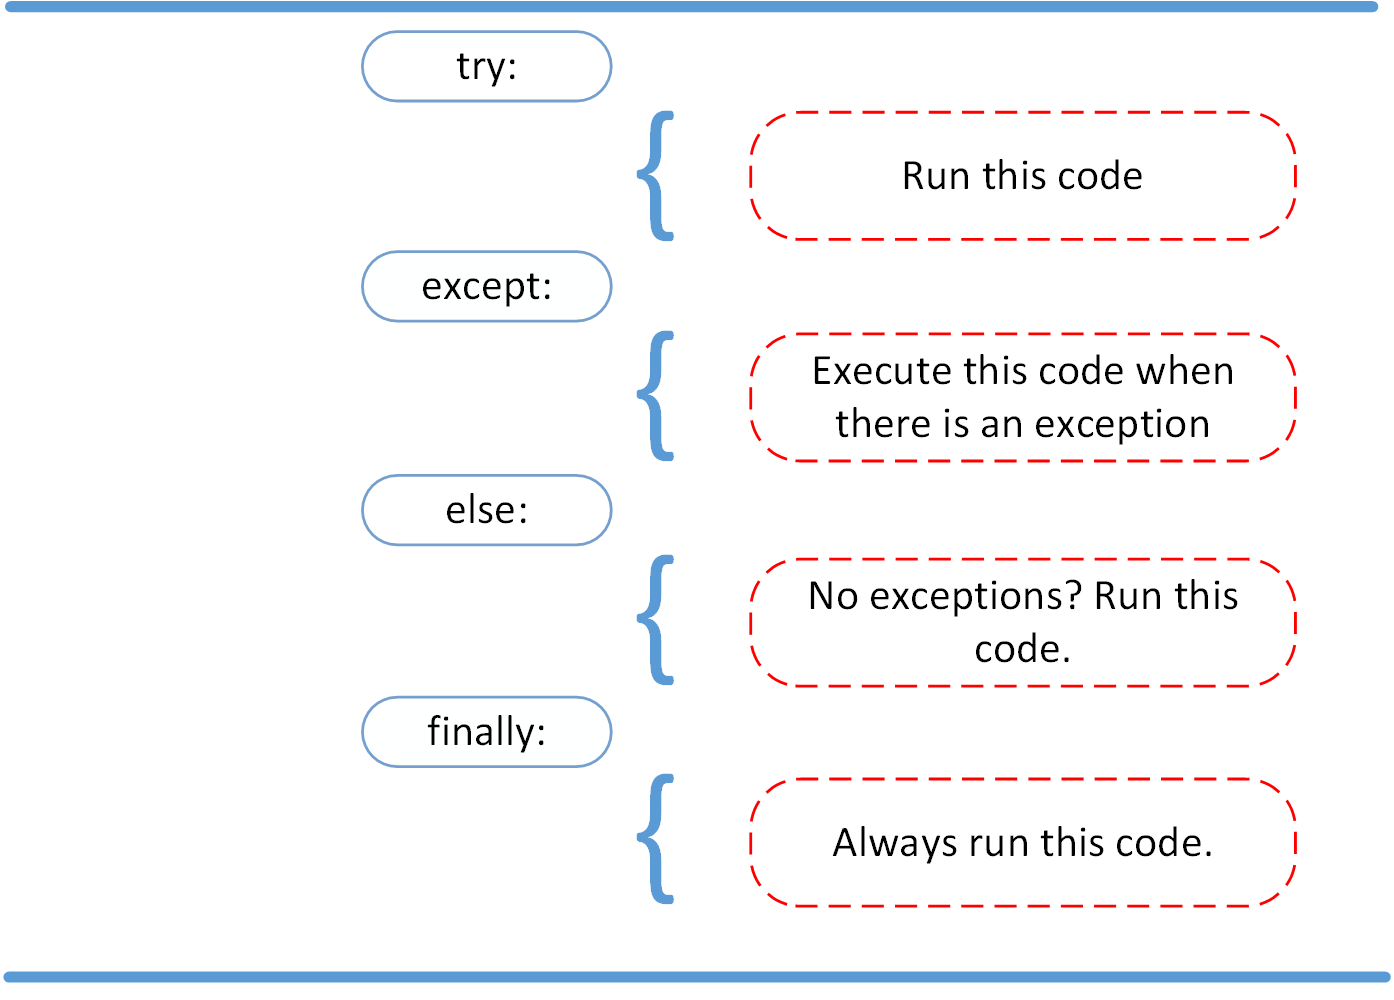
Graphic taken from https://realpython.com/python-exceptions/#exceptions-versus-syntax-errors

Finally makes sense for example if we open a file or a database connection and want to make sure that the file/connection is properly closed at the end, no matter what happened before

### We can also create and throw error ourselves using the "raise" keyword

In [4]:
x = 10
if x>5:
    raise Exception(f"x shouldn't be bigger than 5, but it was {x}")

Exception: x shouldn't be bigger than 5, but it was 10

If we want to create our own errors, we need to create a class that inherits from the Exception class. Then we intercept them accordingly.

In [29]:
class InvalidEmailError(Exception):
    pass

def write_email(email_address):
    if "@" not in email_address:
        raise InvalidEmailError("This email doesn't contain a @")
    print(f"Email written to {email_address}")

email_list = ["abc@gmail.com","tester@gmx.de", "fail.de"]
try:
    for email in email_list:
        write_email(email)
except InvalidEmailError :
    print(f"The email wasn't sent to {email}, it is not a valid email address")

Email written to abc@gmail.com
Email written to tester@gmx.de
The email wasn't sent to fail.de, it is not a valid email address


### We can use the assert keyword to verify a certain condition is met, before executing code

In [11]:
x=10
try:
    assert x==5, "test"
except AssertionError as msg:
    print(msg)

test


### Assert and Raise are very similar conecept, and we're not going too much into the detail here. 
But in short:
- Use assert to detect programming errors and conditions that should never occur and which should crash your program immediately, e.g., invariants of an algorithm.
- Raise an exception for errors that are caused by invalid user input or other problems with the environment (e.g., network errors or unreadable files).

# NEVER DO !!!


So far we've seen that we always write except ValueError/DivisionError etc. In theory we can just except all Errors:

In [17]:
try:
    5/0
except Exception as e:
    print(e)

division by zero


In [18]:
try:
    5/"2"
except Exception as e:
    print(e)

unsupported operand type(s) for /: 'int' and 'str'


So here two different errors were caught. But this is bad practice, because in hindsight it will be very hard to figure out where a problem in your code is. You should only catch exception by name that you can expect

In [21]:
try:
    5/0
except (ValueError, ZeroDivisionError) as e:
    print(e)

division by zero


In [23]:
try:
    5/3
    5/"a"
except ZeroDivisionError as e:
    print(e)
except TypeError as e:
    print(e)

unsupported operand type(s) for /: 'int' and 'str'


The second block of code (with mutliple except statements) lets you handle each Error seperately

# Exercise

### Please fill in the appropriate Errors that are to be excepted and a error message
#####  ( Hint : You can also run the code without the try/except and see what Error you get)

In [ ]:
a=5
b=0
try:
    a/b
except "WRITE YOUR CODE HERE":
    "AND HERE"

In [ ]:
a=5
b = "lets divide by this"
try:
    a/b
except "WRITE YOUR CODE HERE":
    "AND HERE"

In [ ]:
dict1 = {"key1":1, "key2":2}
try:
    dict1["key3"]
except "WRITE YOUR CODE HERE":
    "AND HERE"

In [ ]:
a = 5
b=10
c=50
try:
    a*b + c *d
except "WRITE YOUR CODE HERE":
    "AND HERE" 

# (Unit) Testing

### Now we're going to talk about a related Topic which is testing
### This will be mostly theoretical, and something that you probably won't use in this semester.
### But it is important (especially in Software Engineering) to have heard about it, so don't pay too much attention to the exact implmentation and focus on why we're doing this

So far you have done some kind of testing: You write code and if there is an error, you find the error and play around until your code works again (for some random example)
This works reasonably well for our small functions

But what if we have 100+ functions and there is a bug (that is not throwing an error). 

I'll show you a more structured approach: Unit Testing
So we try to systematically test every unit ( a part of our code/application) and see if it works as we like

This has the advantage, that we can locate bugs more easily 
It also makes it easy to check if everything still works after we do a little change/refactoring

## Let's have a look at an example: We have a calculator class, that can perform basic arithmetics
Code taken from here: https://github.com/mrozenbaum/calculator-unit-test.git

In [43]:
class Calculator():
    """Performs the four basic mathematical operations
        Methods:
     add(number, number)
     subtract(number, number)
     multiply(number, number)
     divide(number,number)
    """

    def add(self, firstOperand, secondOperand):
        """Adds two numbers together
        Arguments:
          firstOperand - Any number
          secondOperand - Any number
        """
        return firstOperand + secondOperand
    def subtract(self, firstOperand, secondOperand): 
        """Subtracts two numbers together
        Arguments:
          firstOperand - Any number
          secondOperand - Any number
        """
        return firstOperand - secondOperand
    def multiply(self, firstOperand, secondOperand):
        """Multiplies two numbers together
        Arguments:
          firstOperand - Any number
          secondOperand - Any number
        """
        return firstOperand * secondOperand
    def divide(self, firstOperand, secondOperand):   
        """Divides two numbers together
        Arguments:
          firstOperand - Any number
          secondOperand - Any number
        """
        return firstOperand / secondOperand

In [47]:
calc = Calculator()
calc.divide(3,8)

0.375

Now we want to make sure that each opeartion works
This will not run in Jupyter Notebook. I'll show it to you in PyCharm

In [ ]:
import unittest
#from calculator import *

def setUpModule():
    print('set up module')

def tearDownModule():
    print('tear down module')

class TestCalculator(unittest.TestCase):

    # Create an instance of the calculator that can be used in all tests
    @classmethod
    def setUpClass(self):
        print('Set up class')
        self.calc = Calculator()

    @classmethod
    def tearDownClass(self):
        print('Tear down class')

    # Write test methods for subtract, multiply, and divide
    def test_add(self):
        self.assertEqual(self.calc.add(2, 7), 9, msg=None)

    def test_subtract(self):
        self.assertEqual(self.calc.subtract(9, 7), 2, msg=None)

    def test_multiply(self):
        self.assertEqual(self.calc.multiply(2, 7), 14, msg=None) 

    def test_divide(self):
        self.assertEqual(self.calc.divide(4, 2), 2, msg=None)           


if __name__ == '__main__':
    unittest.main()

### A common guideline for Testing is F.I.R.S.T, which stands for:
1. Fast
2. Independent
3. Repeatable
4. Self-Validating
5. Timely